In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
county = gpd.read_file('/Users/h6x/ORNL/git/learning/spatial test/data/SVI2018_TENNESSEE_COUNTY.gdb')

In [9]:
census = gpd.read_file('/Users/h6x/ORNL/git/learning/spatial test/data/SVI2018_TENNESSEE_tract.gdb')

In [10]:
county.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Length,Shape_Area,geometry
0,47,TENNESSEE,TN,Moore,47127,"Moore County, Tennessee",129.222493,6322,0,3021,...,0,0,665,207,10.7,3.3,6914,1.608758,0.033477,"MULTIPOLYGON (((-86.53948 35.33544, -86.53610 ..."
1,47,TENNESSEE,TN,Williamson,47187,"Williamson County, Tennessee",582.866127,218648,0,79039,...,1,2,10738,1050,4.9,0.5,224516,2.096580,0.150999,"MULTIPOLYGON (((-87.21220 35.86736, -87.20507 ..."
2,47,TENNESSEE,TN,Smith,47159,"Smith County, Tennessee",314.294959,19458,0,8702,...,0,0,1672,328,8.7,1.7,16073,1.584257,0.084490,"MULTIPOLYGON (((-86.13680 36.29586, -86.13167 ..."
3,47,TENNESSEE,TN,Wilson,47189,"Wilson County, Tennessee",571.091033,132663,0,51847,...,0,0,8634,1045,6.6,0.8,106011,2.275594,0.151347,"MULTIPOLYGON (((-86.59509 36.24146, -86.59328 ..."
4,47,TENNESSEE,TN,Fayette,47047,"Fayette County, Tennessee",704.774920,39692,0,16835,...,0,1,2966,413,7.6,1.1,28561,1.711044,0.181033,"MULTIPOLYGON (((-89.64392 35.00637, -89.64377 ..."


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/793466719.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(county.centroid.x, county.centroid.y, county['FIPS']):


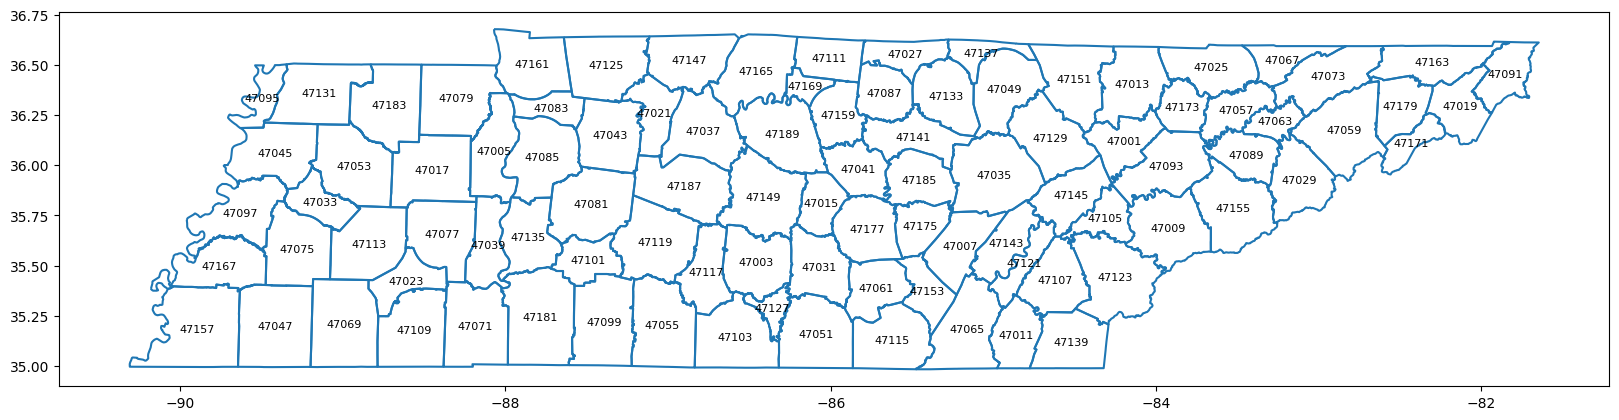

In [16]:
# plot the county structure and in the centroid plot the "FIPS" value

fig, ax = plt.subplots(figsize=(20, 20))
county.boundary.plot(ax=ax)
# county.centroid.plot(ax=ax, color='red')

for x, y, label in zip(county.centroid.x, county.centroid.y, county['FIPS']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/4162322890.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  county.centroid.plot(ax=ax, color='red', markersize=10, label='Centroid')
/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/4162322890.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(county.centroid.x, county.centroid.y, county['FIPS']):


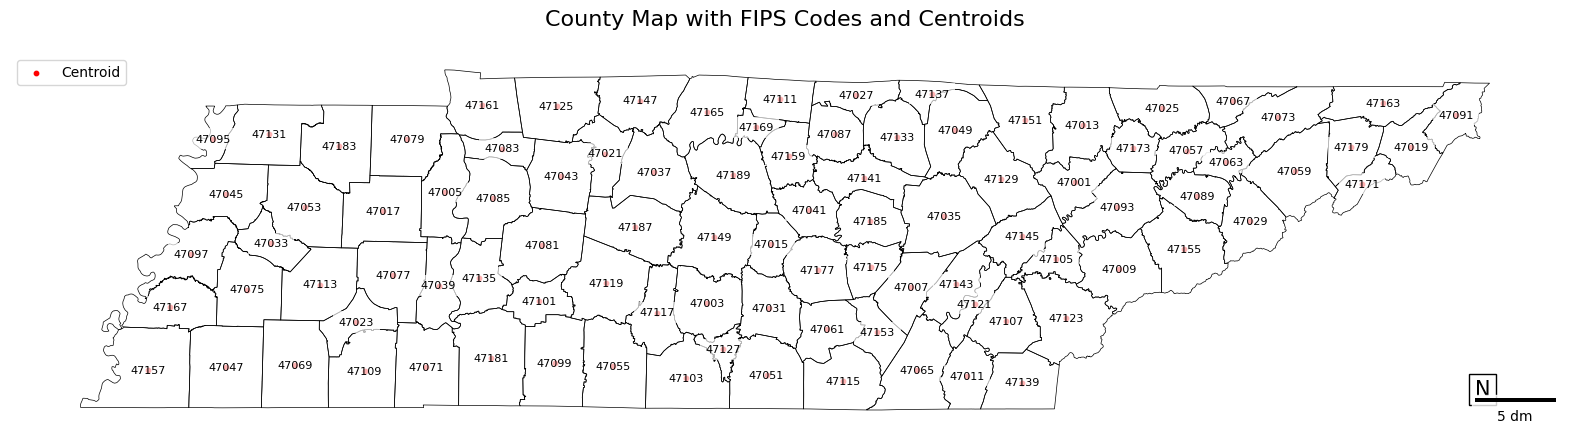

In [19]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar

# Assuming 'county' is a GeoDataFrame with boundary and centroid geometries
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the county boundaries
county.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Optionally, shade counties by a variable (uncomment and replace 'variable' with column name)
# county.plot(ax=ax, column='variable', cmap='viridis', legend=True, alpha=0.5)

# Plot the centroids
county.centroid.plot(ax=ax, color='red', markersize=10, label='Centroid')

# Add FIPS labels with a white background
for x, y, label in zip(county.centroid.x, county.centroid.y, county['FIPS']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Add a title and remove axes
ax.set_title("County Map with FIPS Codes and Centroids", fontsize=16, pad=20)
ax.axis('off')

# Add a scale bar
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', 
                    length_fraction=0.1, box_alpha=0.8)
ax.add_artist(scalebar)

# Optionally add a north arrow
ax.annotate('N', xy=(0.95, 0.1), xycoords='axes fraction', fontsize=15, ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='black'),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Show the legend
ax.legend(loc='upper left')

plt.show()


In [18]:
! pip install matplotlib_scalebar


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/4207772503.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  adjacency = Queen.from_dataframe(county)
/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/4207772503.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = county.centroid


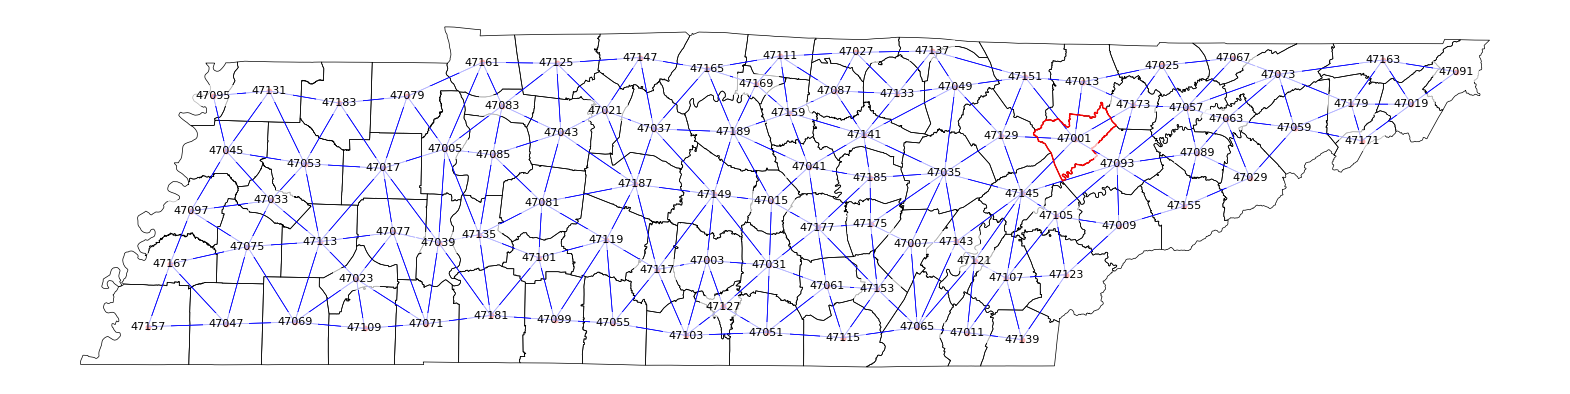

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from libpysal.weights import Queen

# Assuming 'county' is a GeoDataFrame with boundary and centroid geometries

# Compute adjacency using Queen contiguity
adjacency = Queen.from_dataframe(county)

# Extract centroids
centroids = county.centroid
coords = list(zip(centroids.x, centroids.y))

# Create a list of LineStrings for adjacent centroids
lines = []
for i, neighbors in adjacency.neighbors.items():
    for neighbor in neighbors:
        line = LineString([coords[i], coords[neighbor]])
        lines.append(line)

# Convert lines to a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(geometry=lines, crs=county.crs)

# Plot the county boundaries, centroids, and adjacency network
fig, ax = plt.subplots(figsize=(20, 20))

# Plot boundaries
county.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot adjacency network
lines_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Adjacency Network')

# color the County with FIPS=47001
county[county['FIPS'] == '47001'].boundary.plot(ax=ax, color='red', linewidth=1)

# Plot centroids
centroids.plot(ax=ax, color='red', markersize=10, label='Centroids')

# Add labels
for x, y, label in zip(centroids.x, centroids.y, county['FIPS']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Add title and legend
# ax.set_title("County Adjacency Network with Centroids", fontsize=16, pad=20)
# ax.legend(loc='upper left')
ax.axis('off')

plt.show()


In [22]:
census.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Length,Shape_Area,geometry
0,47,TENNESSEE,TN,47001,Anderson,47001020100,"Census Tract 201, Anderson County, Tennessee",5.327891,3159,287,...,1,1,402,149,12.7,4.5,5018,0.208194,0.001378,"MULTIPOLYGON (((-84.31737 35.99324, -84.30915 ..."
1,47,TENNESSEE,TN,47001,Anderson,47001020201,"Census Tract 202.01, Anderson County, Tennessee",9.844384,3989,306,...,0,0,111,91,2.9,2.3,3619,0.259019,0.002801,"MULTIPOLYGON (((-84.24335 36.00155, -84.24089 ..."
2,47,TENNESSEE,TN,47001,Anderson,47001020202,"Census Tract 202.02, Anderson County, Tennessee",3.350453,4165,384,...,1,3,532,351,13.1,8.1,7952,0.176911,0.000900,"MULTIPOLYGON (((-84.25098 36.00645, -84.24837 ..."
3,47,TENNESSEE,TN,47001,Anderson,47001020300,"Census Tract 203, Anderson County, Tennessee",1.822145,3826,332,...,0,1,349,141,9.1,3.4,1817,0.107378,0.000469,"MULTIPOLYGON (((-84.24396 36.04222, -84.23038 ..."
4,47,TENNESSEE,TN,47001,Anderson,47001020400,"Census Tract 204, Anderson County, Tennessee",4.117646,4283,474,...,0,1,742,229,17.4,5.0,8927,0.208556,0.001070,"MULTIPOLYGON (((-84.28855 36.02536, -84.28372 ..."


In [23]:
single_census = census[census['STCNTY'] == '47001']   
single_census.shape

(18, 127)

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/288589001.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  adjacency = Queen.from_dataframe(single_census)
/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2931/288589001.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = single_census.centroid


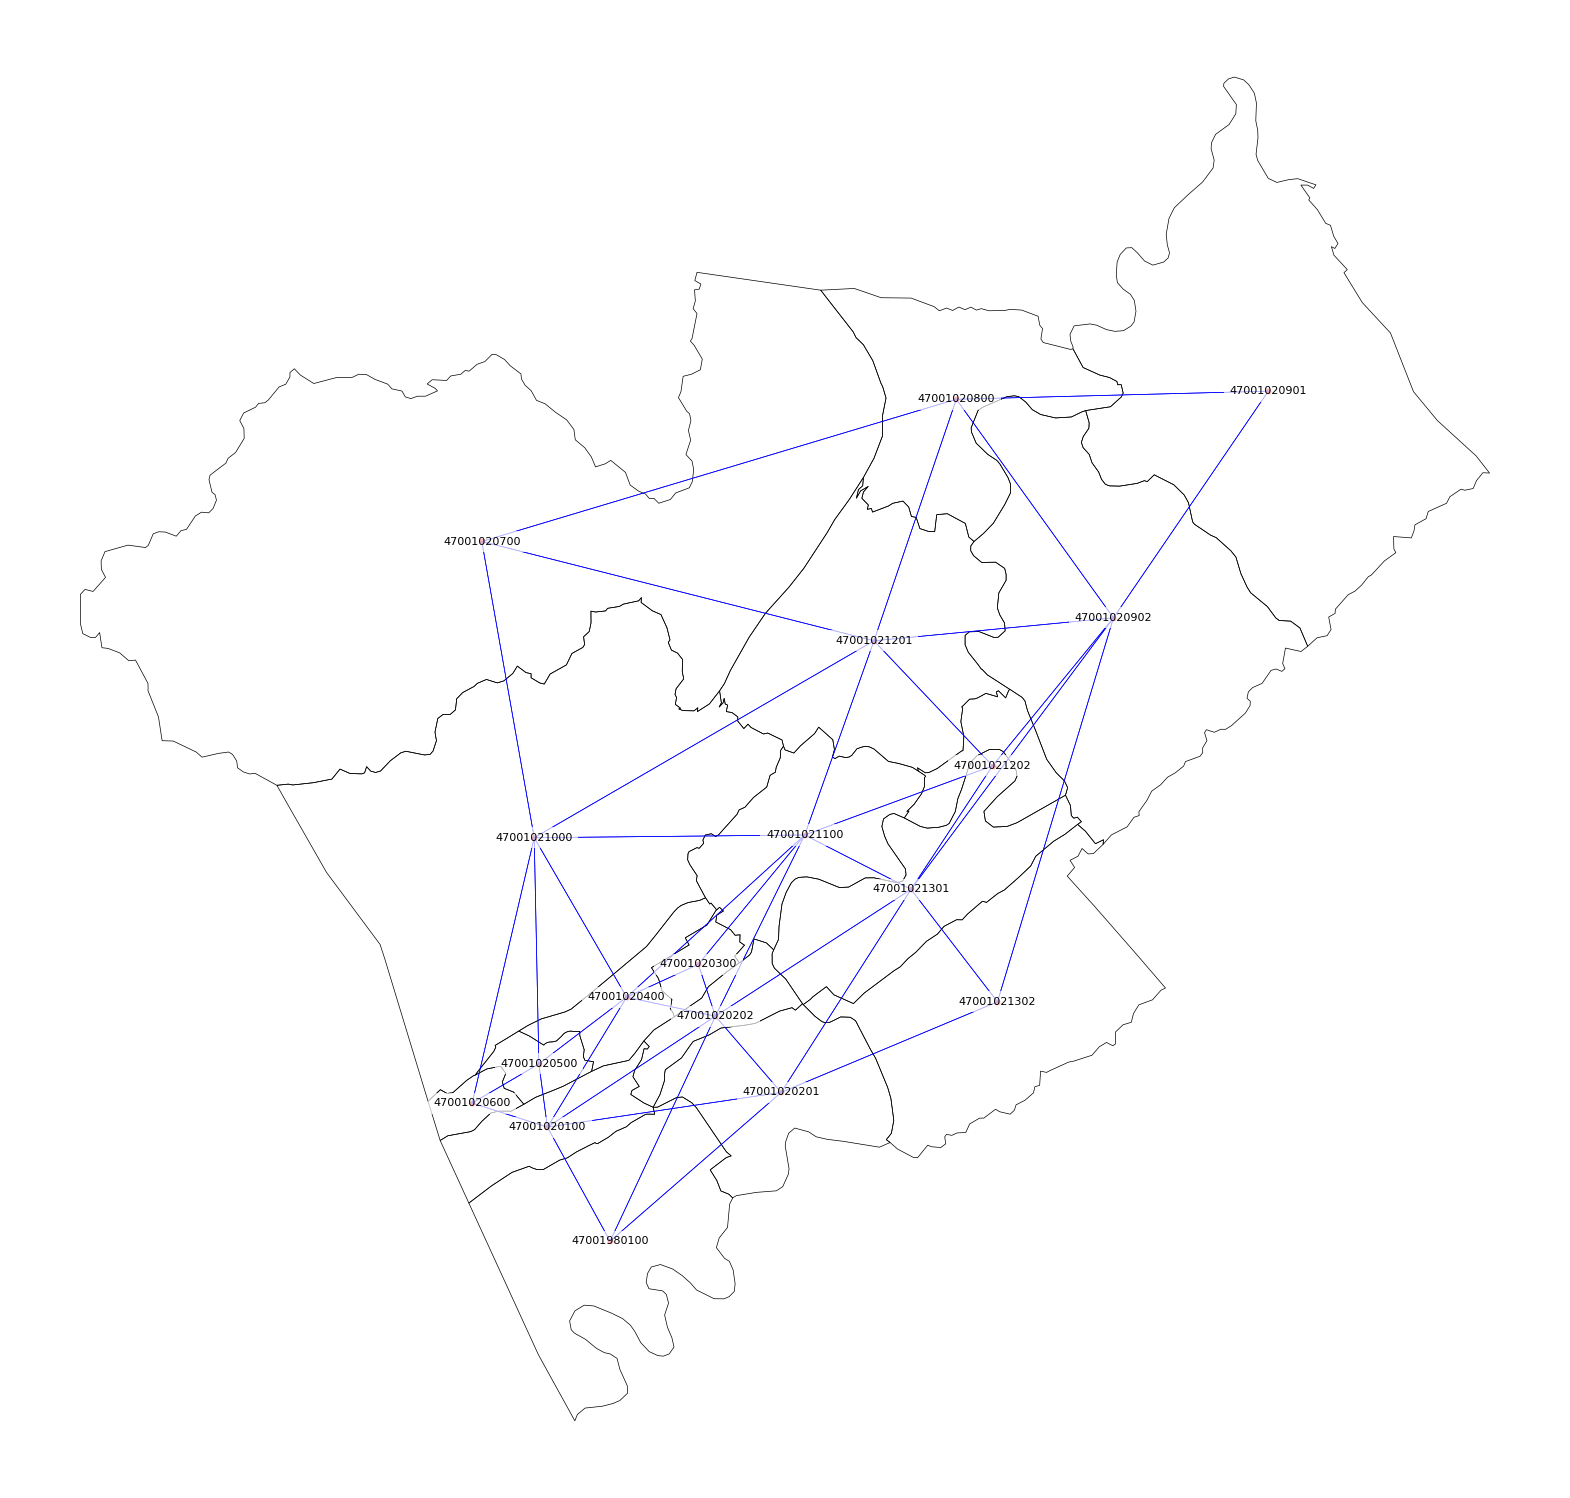

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from libpysal.weights import Queen

# Assuming 'county' is a GeoDataFrame with boundary and centroid geometries

# Compute adjacency using Queen contiguity
adjacency = Queen.from_dataframe(single_census)

# Extract centroids
centroids = single_census.centroid
coords = list(zip(centroids.x, centroids.y))

# Create a list of LineStrings for adjacent centroids
lines = []
for i, neighbors in adjacency.neighbors.items():
    for neighbor in neighbors:
        line = LineString([coords[i], coords[neighbor]])
        lines.append(line)

# Convert lines to a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(geometry=lines, crs=single_census.crs)

# Plot the county boundaries, centroids, and adjacency network
fig, ax = plt.subplots(figsize=(20, 20))

# Plot boundaries
single_census.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot adjacency network
lines_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Adjacency Network')

# Plot centroids
centroids.plot(ax=ax, color='red', markersize=10, label='Centroids')

# Add labels
for x, y, label in zip(centroids.x, centroids.y, single_census['FIPS']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Add title and legend
# ax.set_title("Census Adjacency Network with Centroids", fontsize=16, pad=20)
# ax.legend(loc='upper left')
ax.axis('off')

plt.show()